In [1]:
from splender.image2 import SplenderImage
import jax.random as random

import numpy as np
import jax
import jax.numpy as jnp
from minimum_spanning_tree_inverse_spline_render import get_splines_from_frame

import matplotlib.pyplot as plt

In [2]:
dat = np.loadtxt('mnist_train.csv', delimiter=',')

31
(11, 2)


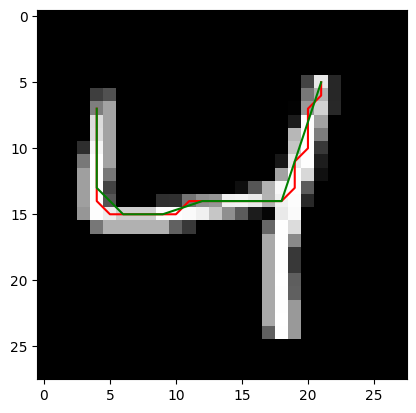

In [3]:
i = 2
img = dat[i, 1:].reshape(28, 28)
img = img / 255.0
path = get_splines_from_frame(img, 0.1)[0][:, ::-1]
print(len(path))
init_spline = np.array(path).astype(np.float32)
init_spline = init_spline[::(init_spline.shape[0] // 8)]
print(init_spline.shape)
plt.imshow(img, cmap='gray')
plt.plot(path[:, 0], path[:, 1], 'r-')
plt.plot(init_spline[:, 0], init_spline[:, 1], 'g-')

In [4]:
jnp.array(init_spline)[None].shape

(1, 11, 2)

In [5]:
tmp = jnp.array(init_spline)[None] / 28

In [6]:
foo = SplenderImage(random.PRNGKey(0), tmp, res = 28)

In [7]:
foo

SplenderImage(
  res=28,
  n_splines=1,
  s_knots=11,
  n_points_per_spline_per_frame=100,
  brush_profile=f32[13],
  spline_contrast=f32[1],
  spline_brightness=f32[1],
  loc_params=f32[1,1,3],
  knot_params=f32[1,11,3],
  kernel=f32[3,3],
  contrast=f32[1],
  brightness=f32[1],
  opacity=f32[1],
  global_scale=f32[1],
  eps=1e-06
)

In [8]:
im = foo()

In [9]:
jax.nn.sigmoid(foo.loc_params + foo.knot_params)

Array([[[0.75000006, 0.17857145, 0.9933071 ],
        [0.71428573, 0.2857143 , 0.9933071 ],
        [0.67857146, 0.39285716, 0.9933071 ],
        [0.64285725, 0.5       , 0.9933071 ],
        [0.5357143 , 0.5       , 0.9933071 ],
        [0.4285715 , 0.5       , 0.9933071 ],
        [0.32142863, 0.5357143 , 0.9933071 ],
        [0.21428575, 0.5357143 , 0.9933071 ],
        [0.14285715, 0.46428573, 0.9933071 ],
        [0.14285715, 0.35714287, 0.9933071 ],
        [0.14285715, 0.25      , 0.9933071 ]]], dtype=float32)

In [10]:
foo.global_scale

Array([0.28], dtype=float32)

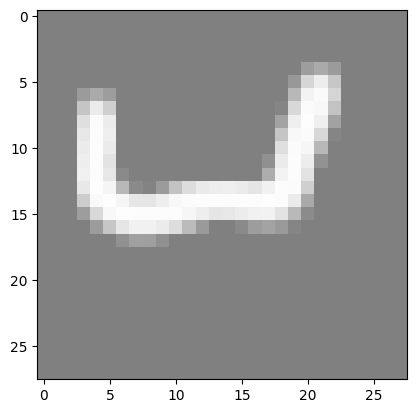

In [11]:
plt.imshow(im, cmap='gray', vmin=0, vmax=1)